In [78]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [7]:
# 경로 설정
path = '../data/ml-latest-small/'

# 해당 path file 확인
os.listdir(path)

['links.csv', 'movies.csv', 'ratings.csv', 'README.txt', 'tags.csv']

In [17]:
ratings_df = pd.read_csv(os.path.join(path + 'ratings.csv'), encoding='utf-8')
tags_df = pd.read_csv(os.path.join(path + 'tags.csv'), encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path + 'movies.csv'), index_col='movieId', encoding='utf-8')

#### 평점 데이터의 기초 통계량

In [26]:
# user 및 영화의 수
n_unique_users = len(ratings_df['userId'].unique())
n_unique_movies = len(ratings_df['movieId'].unique())

print(n_unique_users, n_unique_movies)

610 9724


In [31]:
print('평점의 평균: {:.3f}'.format(ratings_df['rating'].mean()))
print('평점의 표준편차: {:.3f}'.format(ratings_df['rating'].std()))

평점의 평균: 3.502
평점의 표준편차: 1.043


In [32]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [33]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [34]:
# nan 값 확인
ratings_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

array([[<AxesSubplot:title={'center':'userId'}>,
        <AxesSubplot:title={'center':'movieId'}>],
       [<AxesSubplot:title={'center':'rating'}>, <AxesSubplot:>]],
      dtype=object)

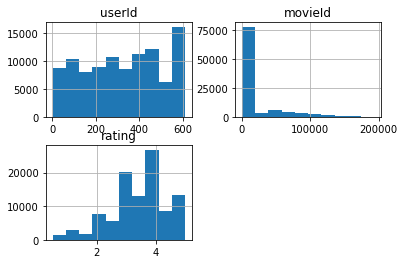

In [41]:
ratings_df[['userId','movieId','rating']].hist()

#### Pandas GroupBy 사용

In [55]:
ratings_df.groupby(['userId', 'rating']).size()

userId  rating
1       1.0         1
        2.0         5
        3.0        26
        4.0        76
        5.0       124
                 ... 
610     3.0       230
        3.5       315
        4.0       286
        4.5       148
        5.0       180
Length: 3976, dtype: int64

In [57]:
ratings_df.groupby(['userId']).mean()['rating']

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Name: rating, Length: 610, dtype: float64

In [72]:
userid_rating_df = pd.DataFrame({'count': ratings_df.groupby(['userId', 'rating']).size()})
userid_rating_df = userid_rating_df.reset_index() # multi index reset
userid_rating_df.head(3)

,userId,rating,count
0,1,1.0,1
1,1,2.0,5
2,1,3.0,26


In [75]:
user_info = ratings_df.groupby('userId')['movieId'].count()
user_info.describe()

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
max      2698.000000
Name: movieId, dtype: float64

<AxesSubplot:ylabel='Density'>

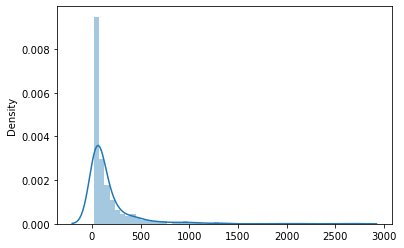

In [80]:
# user가 몇개의 영화에 대해 rating 했는지를 나타내는 분포
sns.distplot(user_info.values)

#### user가 평균적으로 준 평점과 평점을 준 영화의 수

In [108]:
stats_df = pd.DataFrame({
    'movie_count' : ratings_df.groupby('userId')['movieId'].count(),
    'rating_avg' : round(ratings_df.groupby('userId')['rating'].mean(), 2),
    'rating_std' : ratings_df.groupby('userId')['rating'].std().round(2)
})

print(stats_df.shape)
stats_df.head()

(610, 3)


,movie_count,rating_avg,rating_std
userId,,,
1,232,4.37,0.80
2,29,3.95,0.81
3,39,2.44,2.09
4,216,3.56,1.31
5,44,3.64,0.99


#### rating 수가 많은 영화

In [119]:
movieid_user_df = pd.DataFrame({
    'num_users_watch': ratings_df.groupby('movieId')['userId'].count(),
    'avg_ratings': ratings_df.groupby('movieId')['rating'].mean().round(2),
    'std_ratings': ratings_df.groupby('movieId')['rating'].std().round(2)
})

movieid_user_df = movieid_user_df.reset_index()

print(movieid_user_df.shape)
movieid_user_df.head(3)

(9724, 4)


,movieId,num_users_watch,avg_ratings,std_ratings
0,1,215,3.92,0.83
1,2,110,3.43,0.88
2,3,52,3.26,1.05


In [123]:
movieid_user_df.sort_values(by='num_users_watch', ascending=False).head(5)

,movieId,num_users_watch,avg_ratings,std_ratings
314,356,329,4.16,0.83
277,318,317,4.43,0.71
257,296,307,4.20,0.95
510,593,279,4.16,0.85
1938,2571,278,4.19,0.98


<AxesSubplot:>

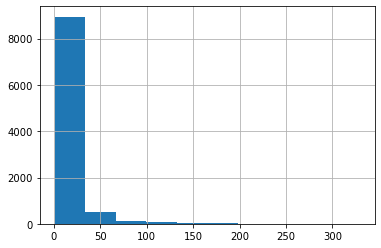

In [126]:
# long tail economy
movieid_user_df['num_users_watch'].hist()

In [136]:
# rating 수가 3 미만인 영화 수
movieid_user_df['movieId'][movieid_user_df.num_users_watch < 3].count()

4744

#### 평점이 높은 영화(장르), 평점을 많이 받은 영화(장르)

In [138]:
# 영화 정보 활용
movies_df.head(3)

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance


In [140]:
# 평점을 많이 받은 영화
ratings_count_df = ratings_df.groupby('movieId')['userId'].count()
ratings_count_df.head(3)

movieId
1    215
2    110
3     52
Name: userId, dtype: int64

In [141]:
df = pd.DataFrame({
    'ratings_count': ratings_df.groupby('movieId')['userId'].count(),
})

In [160]:
df['movie_name'] = df.apply(lambda x : movies_df['title'][x.index])

In [162]:
df.head(5)

,ratings_count,movie_name
movieId,,
1,215,Toy Story (1995)
2,110,Jumanji (1995)
3,52,Grumpier Old Men (1995)
4,7,Waiting to Exhale (1995)
5,49,Father of the Bride Part II (1995)


In [165]:
df.sort_values(by='ratings_count',ascending=False).head(5)

,ratings_count,movie_name
movieId,,
356,329,Forrest Gump (1994)
318,317,"Shawshank Redemption, The (1994)"
296,307,Pulp Fiction (1994)
593,279,"Silence of the Lambs, The (1991)"
2571,278,"Matrix, The (1999)"
